* Author @ Bijoyendra Shekhar

#ASSIGNMENT

Importing the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading Data

* DATASET LINK : https://drive.google.com/file/d/1OqMLtHJEU4JNzJGQNoJ5sUg7_zE50iAr/view?usp=sharing

In [ ]:

df = pd.read_csv('/content/flavorwiki.csv') 
df.head()
     

#Data Pre-processing

Data preprocessing is the process of preparing data for analysis by cleaning, transforming, and organizing it. This involves a variety of tasks such as:
Removing missing or invalid data, Handling outliers
, Normalizing or standardizing the data
, Encoding categorical data etc

Overall, data preprocessing is an important step in the data science process as it helps to ensure that the data is clean, consistent, and ready for analysis.

In [ ]:
df.columns

In [ ]:
for column in df.columns:
    print(df[column].value_counts())

Renaming Columns

In [ ]:

df.rename(columns = {"Unique Identifier":"id", "What is your gender? - label":"genderLabel",
       'What is your gender? - value':'genderValue', 'What is your age group? - label':'ageGroup',
       'What is your age group? - value':'ageGroupValue',
       'How much do you like or dislike the PACKAGING for this product? - label':'viewsOnPackaging',
       'How much do you like or dislike the PACKAGING for this product? - value':'viewsOnPackagingValue',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - FUN':'desciptionMatchesFun',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - CONVENIENT':'desciptionMatchesConvenient',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - FAMILIAR':'desciptionMatchesFamiliar',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - CHEAP':'desciptionMatchesCheap',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - BORING':'desciptionMatchesBoring',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - INDIFFERENT':'desciptionMatchesIndifferent',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - PLAIN':'desciptionMatchesPlain',
       'In scale 1-10 how much do you think this description match with the product PACKAGING - PREMIUM':'desciptionMatchesPremium',
       "Before tasting the product, how likely would you be to purchase this product, if you didn't have to buy it for this study? - label":"beforeTastingBuyingLabel",
       "Before tasting the product, how likely would you be to purchase this product, if you didn't have to buy it for this study? - value":"beforeTastingBuyingValue",
       'Open the packaging. How much do you like or dislike the APPEARANCE of the products? - label':'viewsAfterOpeningLabel',
       'Open the packaging. How much do you like or dislike the APPEARANCE of the products? - value':'viewsAfterOpeningValue',
       'How would you rate the AMOUNT OF SEASONING of the products? - label':'rateSeasoningLabel',
       'How would you rate the AMOUNT OF SEASONING of the products? - value':'rateSeasoningValue',
       'Taste the products. How do you like the products OVERALL? - label':'tasteProductLabel',
       'Taste the products. How do you like the products OVERALL? - value':'tasteProductValue',
       'How much do you like or dislike the FLAVOR of the products? - label':'flavorLabel',
       'How much do you like or dislike the FLAVOR of the products? - value':'flavorValue',
       'How would you rate the FLAVOR of the products? - label':'rateProductFlavorLabel',
       'How would you rate the FLAVOR of the products? - value':'rateProductFlavorValue',
       'How much do you like or dislike the TEXTURE of the products? - label':'viewsTextureLabel',
       'How much do you like or dislike the TEXTURE of the products? - value':'viewsTextureValue',
       'How much do you like or dislike the AFTERTASTE of the products? - label':'viewsAftertasteLabel',
       'How much do you like or dislike the AFTERTASTE of the products? - value':'viewsAftertasteValue',
       'Now that you have tasted the products, how likely would you be to re-purchase the products? - label':'repurchaseLabel',
       'Now that you have tasted the products, how likely would you be to re-purchase the products? - value':'repurchaseValue'}, inplace = True)

In [ ]:
df.columns

Dropping un-wanted Columns

In [ ]:
df.drop(columns=['genderLabel', 'ageGroup', 'viewsOnPackaging','beforeTastingBuyingLabel',
                 'viewsAfterOpeningLabel','rateSeasoningLabel','tasteProductLabel',
                 'flavorLabel','rateProductFlavorLabel', 'viewsTextureLabel', 'viewsAftertasteLabel',
                 'repurchaseLabel'], inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.shape

Checking Data Type

In [ ]:
display(df.dtypes)

Checking any null values

In [ ]:
df.isna().sum()

To encode a column in a dataframe that has a dtype of object, we can use the LabelEncoder class from the sklearn library. The LabelEncoder class allows we to convert the values in a column to numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit the LabelEncoder object on the column you want to encode
df['Product'] = le.fit_transform(df['Product'])


In [ ]:
df.head(2)

Missing value Treatment

In general, it's always better to try and keep as much data as possible, so dropping missing values should be a last resort. One approach to dealing with missing values is to replace them with the mean or median of the remaining values. This is known as imputation. 

In [ ]:
df["tasteProductValue"].fillna(df["tasteProductValue"].mode(), inplace=True)

df["repurchaseValue"].fillna(df["repurchaseValue"].mode(), inplace=True) 

In [ ]:
df.duplicated().sum()

Re-checking for missing values

In [ ]:
df.isna().sum()

In [ ]:
df[df.isnull().any(axis=1)]

Missing values still present after imputation. Therefore dropping rows with missing values.

In [ ]:
df=df.dropna().reset_index(drop=True) #deleting the NaN row and Reset index after drop

Saving It to a new file called data

In [ ]:
#DATAFRAME WITH NUMERICAL VALUES
# Save the DataFrame to a CSV file
df.to_csv("data.csv")

In [ ]:
df.columns

#Feature Engineering

Feature engineering is the process of creating new features or transforming existing features in a dataset in order to extract more meaningful information or to better suit the requirements of a machine learning model. It is an important step in the exploratory data analysis (EDA) process, as it can help to improve the performance of machine learning models by providing them with more relevant and structured data to learn from

Mapping function is a function that is applied to each element in a specific column. This can be used to transform the values in the column according to some logic.

In [ ]:
#Gender
mapping = {1:'Male',2:'Female'}
df['genderValue'] = df['genderValue'].map(mapping)

In [ ]:
#Product
mapping = {0:'A',1:'B',2:'C',3:'D',4:'E'}
df['Product'] = df['Product'].map(mapping)

In [ ]:
#Age Group
mapping = {2:'18-34 (Millennials)',3:'35-44 (Young Adults)',4:'45-55 (Late Adults)',5:'56-64 ( Senior Population)'}
df['ageGroupValue'] = df['ageGroupValue'].map(mapping)

In [ ]:
#Amount of Seasoning
mapping = {1:'Much too little (1/5)',2:'Somewhat too little (2/5)',3:'Just about right (3/5)',4:'Somewhat too much (4/5)',5:'Much too much (5/5)'}
df['rateSeasoningValue'] = df['rateSeasoningValue'].map(mapping)

In [ ]:
#Flavors
mapping = {1:'Not at all strong enough (1/5)',2:'Not quite strong enough (2/5)',3:'Just about right (3/5)',4:'Slightly too strong (4/5)',5:'Much too strong (5/5)'}
df['rateProductFlavorValue'] = df['rateProductFlavorValue'].map(mapping)

In [ ]:
#Repurchase
mapping = {1.0:'Definitely would not purchase (1/5)',2.0:'Probably would not purchase (2/5)',3.0:'Might or might not purchase (3/5)',4.0:'Probably would purchase (4/5)',5.0:'Definitely would purchase (5/5)'}
df['repurchaseValue'] = df['repurchaseValue'].map(mapping)

In [ ]:

#Ratings
# Create a dictionary mapping the numerical values to categorical values

columns_lab= [
       'viewsOnPackagingValue', 'desciptionMatchesFun',
       'desciptionMatchesConvenient', 'desciptionMatchesFamiliar',
       'desciptionMatchesCheap', 'desciptionMatchesBoring',
       'desciptionMatchesIndifferent', 'desciptionMatchesPlain',
       'desciptionMatchesPremium', 'beforeTastingBuyingValue',
       'viewsAfterOpeningValue',  'tasteProductValue','viewsTextureValue','flavorValue',
       'viewsAftertasteValue']
mapping = {1: 'Dislike Extremely (1/9)', 2: 'Dislike Very Much (2/9)', 3: 'Dislike Moderately (3/9)', 4: 'Dislike Slightly (4/9)', 5: 'Neither Like nor Dislike (5/9)',6:'Like Slightly (6/9)',7:'Like Moderately (7/9)',8:'Like Very Much (8/9)',9:'Like Extremely (9/9)'}

# Use a for loop to apply the map() method to each column
for col in columns_lab:
    df[col] = df[col].map(mapping)

# Print the updated DataFrame
df.head(2)


CREATING FILE DATA_LABEL

In [ ]:
#CATEGORICAL DATAFRAME
# Save the DataFrame to a CSV file
df.to_csv("data_label.csv")

In [ ]:
data = pd.read_csv('/content/data.csv') 
data.head(2)

In [ ]:
data_label = pd.read_csv('/content/data_label.csv') 
data.head(2)

CHECKING ENTRIES

In [ ]:
for column in df.columns:
    print(df[column].value_counts())

#CORRELATION TABLE HEATMAP

A correlation table is a table that shows the correlation coefficient between different variables in a dataset. The correlation coefficient is a measure of how strongly two variables are related to each other. It can range from -1 to 1, where -1 indicates a strong negative relationship (i.e., as one variable increases, the other variable decreases), 0 indicates no relationship, and 1 indicates a strong positive relationship (i.e., as one variable increases, the other variable increases as well).

To interpret the results of a correlation table, we need to look at the correlation coefficients for each pair of variables. A coefficient close to 1 (or -1) indicates a strong relationship, while a coefficient close to 0 indicates a weak or no relationship. we can also compare the coefficients for different pairs of variables to see which ones have the strongest relationships. For example, if we have three variables, A, B, and C, and the correlation table shows that the coefficient between A and B is 0.9, the coefficient between A and C is 0.7, and the coefficient between B and C is 0.8, this suggests that there is a strong relationship between A and B, a moderate relationship between A and C, and a moderate relationship between B and C.

It's important to keep in mind that a high correlation coefficient does not necessarily mean that one variable causes the other. It just means that there is a strong relationship between the two variables. To determine whether one variable causes the other, we would need to conduct additional analysis.

PLOTTING CORRELATION HEATMAP

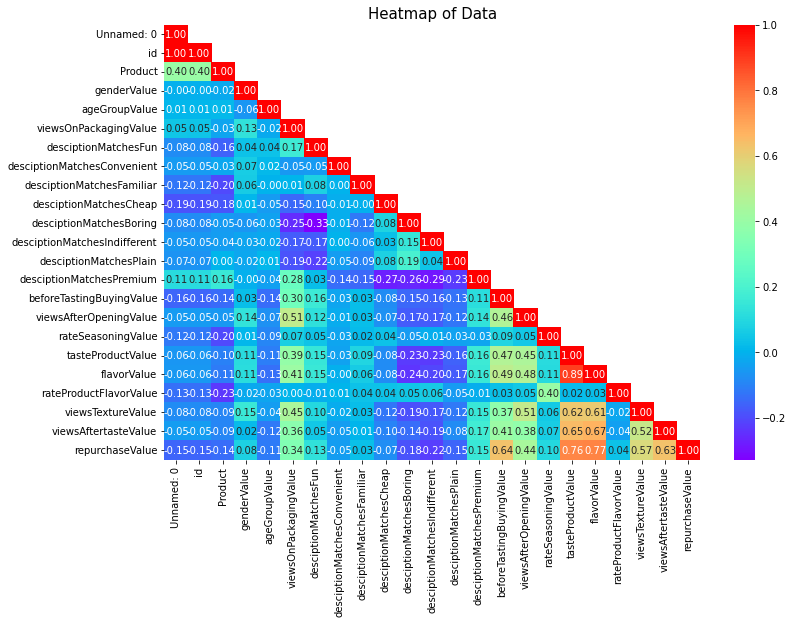

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(data.corr(),+1))

# Add title to the plot
plt.title("Heatmap of Data", fontsize=15, fontname="Arial")

plt.show()


*   A dark blue cell in the heatmap, this indicates a strong 
negative relationship between the two variables that the cell represents. This means that as one variable increases, the other variable decreases. If we see a dark red cell, this indicates a strong positive relationship between the two variables. This means that as one variable increases, the other variable also increases.

*   We can also look at the numbers in the cells of the heatmap to see the exact correlation coefficients for each pair of variables. The correlation coefficient is a measure of how strongly two variables are related to each other. It can range from -1 to 1, where -1 indicates a strong negative relationship, 0 indicates no relationship, and 1 indicates a strong positive relationship.

*   By looking at the colors and the numbers in the cells of the heatmap, we can come to conclusions about the relationships between the variables in the data. For example, if we see a dark red cell with a correlation coefficient of 0.9, this indicates a strong positive relationship between the two variables that the cell represents. On the other hand, if we see a light green cell with a correlation coefficient of 0.2, this indicates a weak relationship between the two variables.

OBSERVATIONS

1. Positive Correlation: 
*   Flavour Maches the taste 
*   Taste and flavor of product as per the texture
*   Taste and flavor of the product after testing the product
*   Buying of product before tasting and after tasting has positive relationship with repurchase value
 
These contribute to higher repurchase values

2. Negative Correlarion
*   Description as premium but actually it matches with cheap, boring, different, plain or convinient
*   Description matches cheap, boring, different, plain a has negative relationship with repurchase value.

These decreases repurchase value


#OUTLIERS

A box plot, also known as a box and whisker plot, is a graphical representation of a dataset that displays the minimum, first quartile, median, third quartile, and maximum values. An outlier in a box plot is a data point that is significantly different from the other data points in the dataset. Outliers are often plotted separately from the main plot, either as a dot above or below the box plot, or as a separate plot entirely. Outliers can be caused by a number of factors, such as measurement errors, data entry errors, or true differences in the underlying population being studied. It is important to identify and understand outliers in a dataset, as they can have a significant impact on the results of statistical analyses and may indicate the need for further investigation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


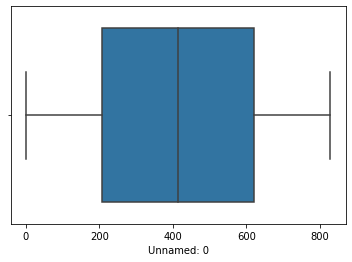

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


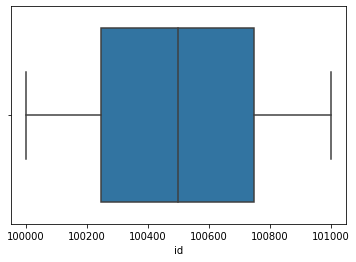

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


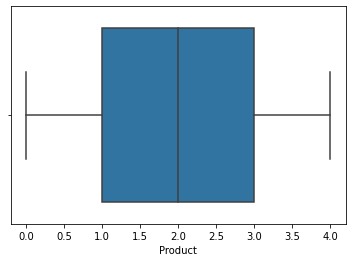

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


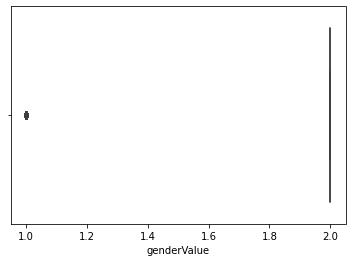

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


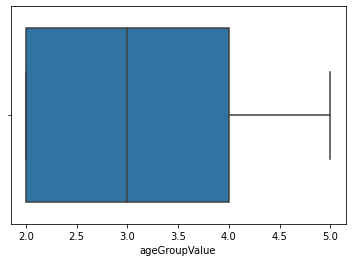

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


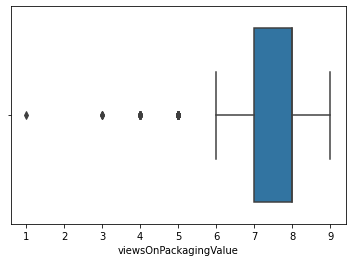

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


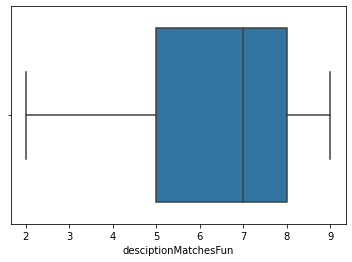

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


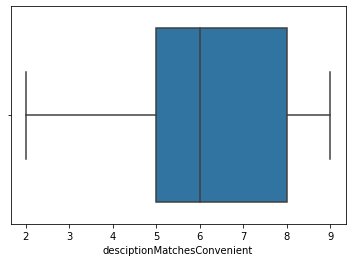

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


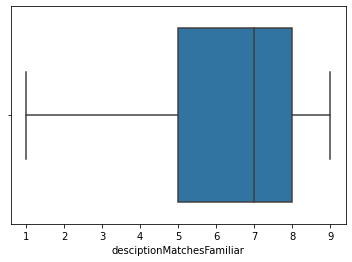

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


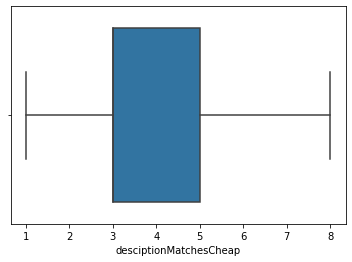

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


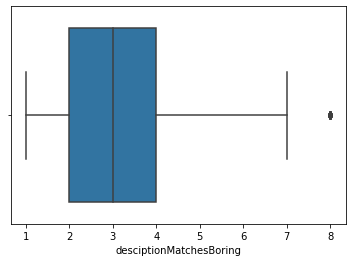

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


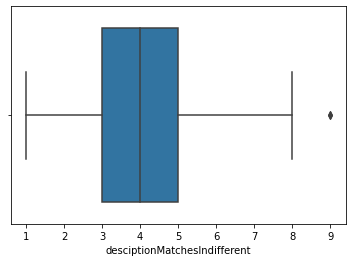

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


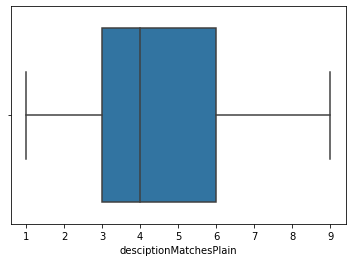

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


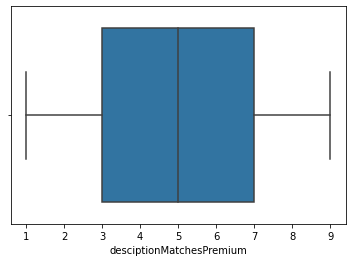

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


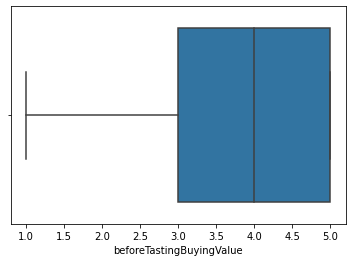

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


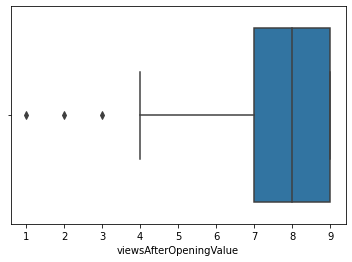

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


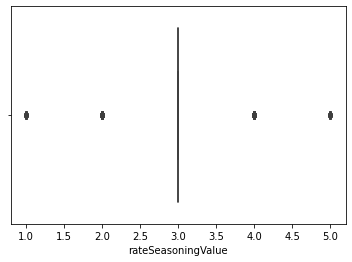

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


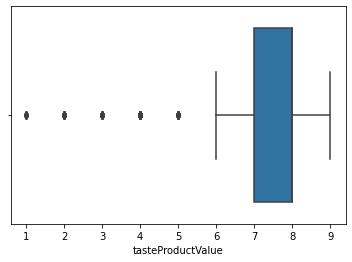

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


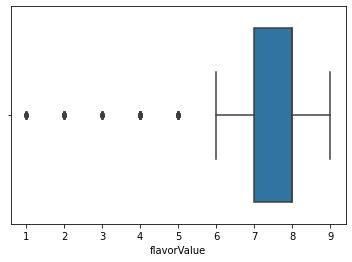

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


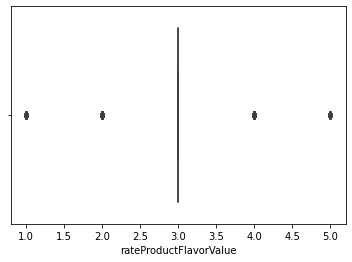

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


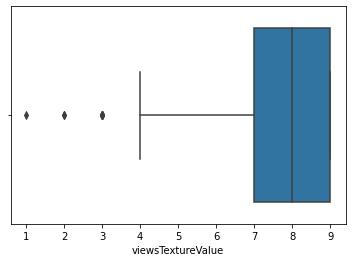

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


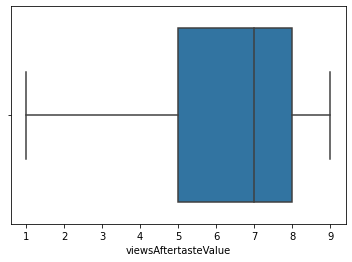

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


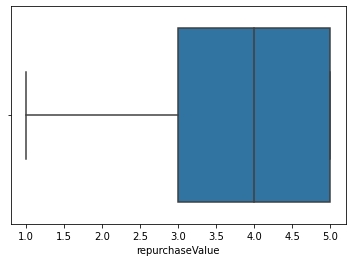

In [ ]:
# Create an array of x-axis values to iterate over
# Get the names of the columns in the DataFrame
col_names = data.columns

for i in col_names:
    sns.boxplot(data[i],whis=1.5)
    plt.show();

OBSERVATIONS

1. Products

* 5 Types of products, encoded as 0,1,2,3,4 or A, B, C, D and E
* Most Products Lie are of Type 1 to 3 or B to D
* Median of product is 2, i.e., most of the products are of C type
* Some products are from A or D type i.e., of type 0 or 4

2. Genders
* There are 2 genders, namely male and female

3. Gender Group
* 4 groups 18-35. 35-44, 45-55,56-64
* Median age group being 35-44

4. Views on Packaging
* Most rated 7 or 8
* Some rated 6 or 9
* Very Few Rated 1 to 5

5. Views On Product described as Fun
* Most people rated between 5 to 7
* Some people rated it 2 to 4, and 9

6. Views On Product described as Convenient
* Most people rated between 5 to 8 
* Some people rated it 2 to 4, and 9 
* Median rating being 6

7. Views On Product described as Familiar
* Most people rated between 5 to 8
* Some people rated it 1 to 4, and 9
* Median rating being 7

8. Views On Product described as Cheap
* Most people rated from 3 to 5
* Some rated as 1 to 2 or 6 to 8

9. Views On Product described as Boring
* Most people rated 2 to 4
* Some people rate 1 and 5 to 7
* Very few people rated 8
* Median rating being 3

10. Views On Product described as Indifferent
* Most people rated 5 to 5
* Some people rate 1 to 2 and 6 to 8
* Very few people rated 9
* Median rating being 4

11. Views On Product described as Plain
* Most people rated 3 to 6
* Some people rate 1 to 2 and 7 to 9
* Median rating being 4

12. Views On Product described as Indifferent
* Most people rated 3 to 7
* Some people rate 1 to 2 and 7 to 9
* Median rating being 5

13. Buying product before tasting 
* Most people rated 3 to 5
* Some people rate 1 and 2
* Median rating being 4

14. Views On After opening the product 
* Most people rated it at 7 to 9
* Some people rate it at4 to 7 
* Very few people rated it at 1 to 3
* Median rating being 8

15. Views on Seasoning
* Most people 3
* Very few people rated it at 1,2,4 and 5
* Median rating being 3

16. Views On Taste of product
* Most people rated it at 7 to 8
* Some people rate it at 6 or 9 
* Very few people rated it at 1 to 5

17. Views On Flavour value
* Most people rated it at 7 or 8
* Some people rate it at 6 or 9 
* Very few people rated it at 1 to 5

18. Views on Favour type
* Most people rated it at 7 to 9
* Some people rate it at 4 to 6
* Very few people rated it at 1 to 3
* Median rating being 8

19. Views on After Taste
* Most people rated it at 5 to 8
* Some people rate it at 1 to 4 or 9
* Median rating being 7

20. Views on Repurchase Value
* Most people rated it at 3 to 5
* Some people rate it at 1 to 2
* Median rating being 4


#Univariate Amnalysis

UNIVARIATE analysis is a statistical technique that involves the analysis of a single variable or feature. It is a way to understand the characteristics and distribution of the data for that particular variable. In the context of adaptive data analysis (ADA), univariate analysis is a method for examining and understanding the behavior of a single feature or variable in a dataset, without considering the relationships or interactions with other variables. This can be useful for identifying patterns and trends in the data, as well as for identifying any potential outliers or anomalies. Univariate analysis is often used as a first step in exploring and understanding a dataset, and can be followed by more complex multivariate analyses that consider multiple variables at once.

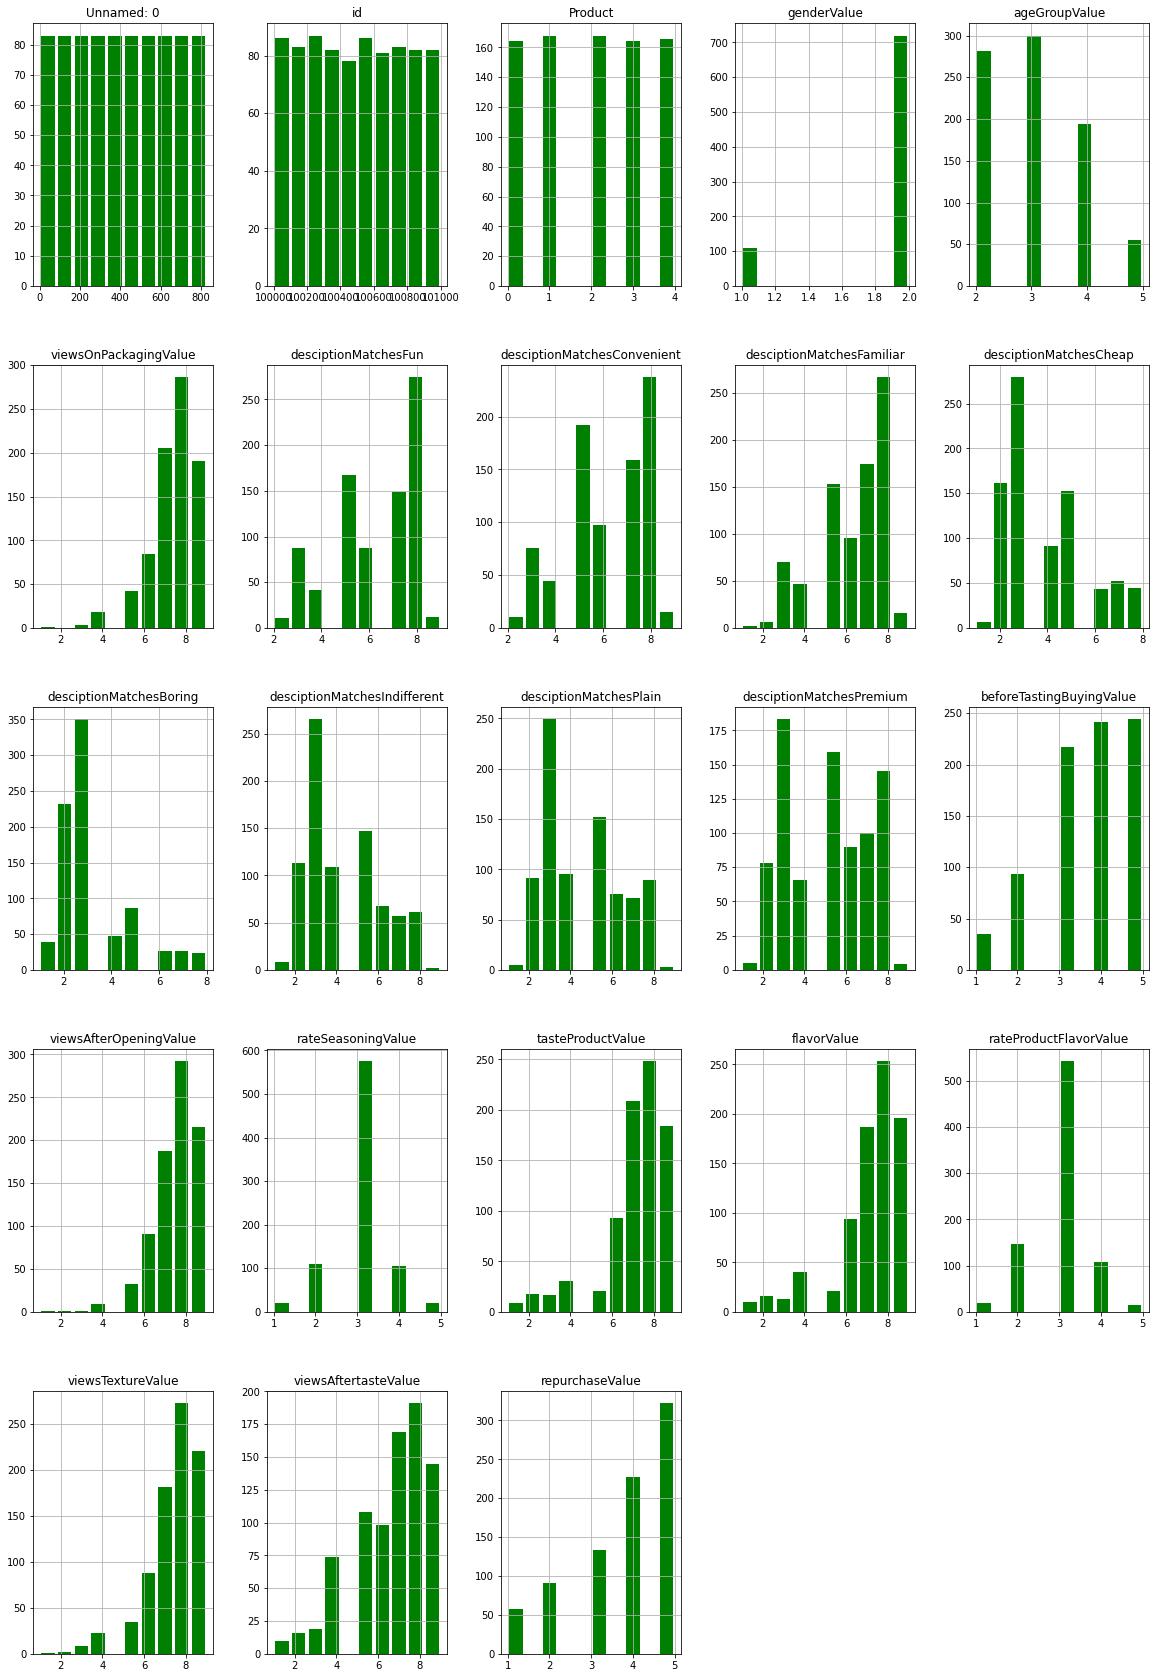

In [ ]:
data.hist(figsize=(20,30), rwidth=0.8, color=["g"]);

**OBSERVATIONS**

* Products are equally distributed
*   Age is right skewed. Most of the participants of survey are young and adults
*   Product Packaging is left skewed. People like the Packaging of product.	
* Description of product as fun is Left skewed. Most people liked the product.
*	Description of product as convenient is Left skewed. Most people liked the product.
* Description of product as familiar is Left skewed. Most people liked the product.
* Description of product as cheap is right skewed. Most people didn’t like the product.
* Description of product as boring is right skewed. Most people didn’t like the product.
* Description of product as indifferent is right skewed. Most people didn’t like the product.
* Description of product as plain is right skewed. Most people didn’t like the product.
* Description of product as Premium is multimodal with 2 peaks. Some people didn’t like the product, and some liked it.
* Views after opening the product is left skewed. Most people liked the product.
* Views on taste, flavour, texture, views after taste are left skewed. Most people liked them.
* Views on Seasoning and flavour type is symmetrical implying neutral ratings
* Repurchase is left skewed. Most of the people would like to re-purchase the product.


PLOTTING ALL VARIABLES ONE BY ONE

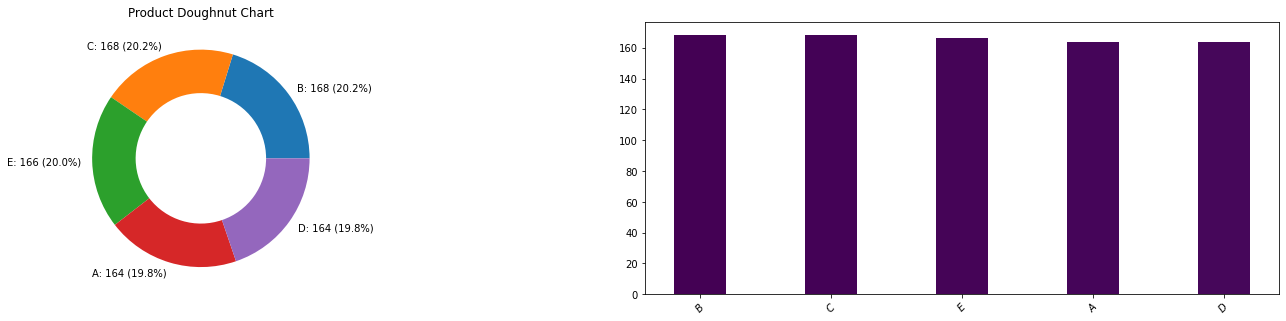

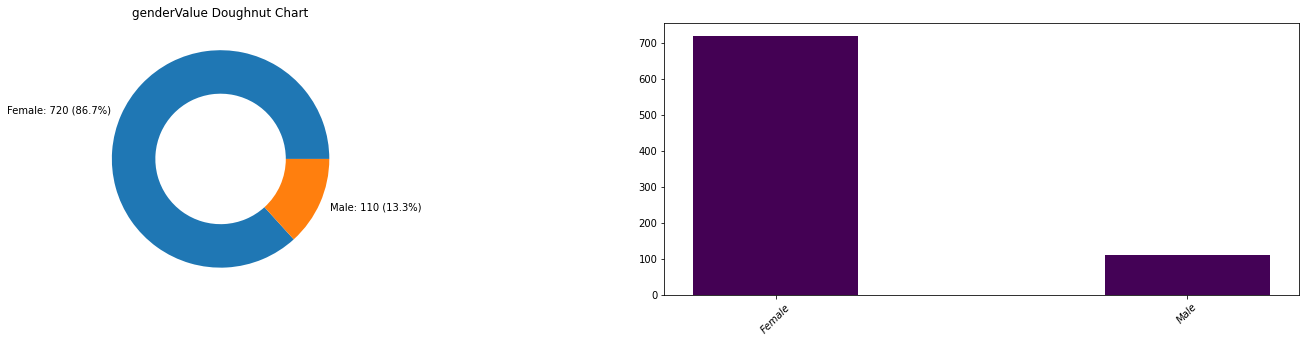

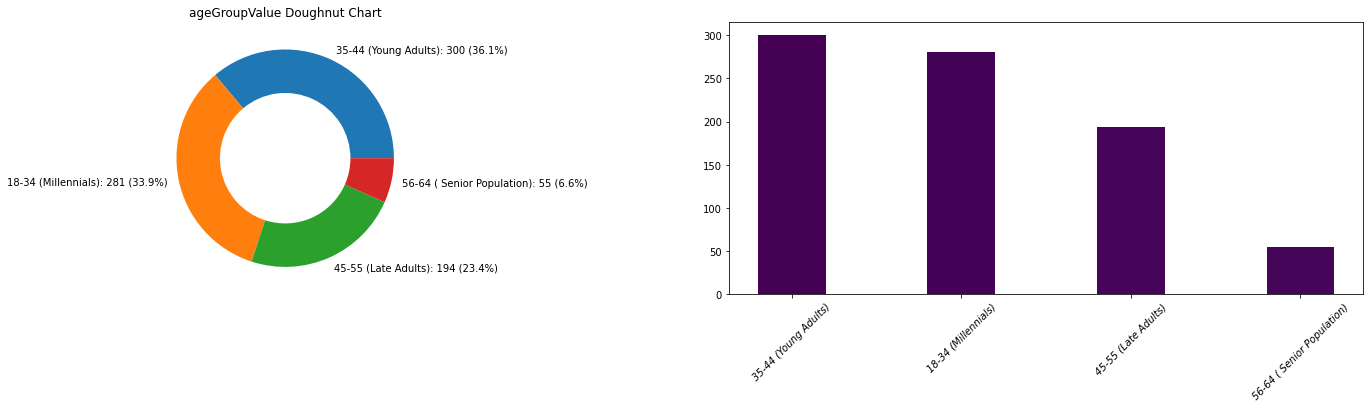

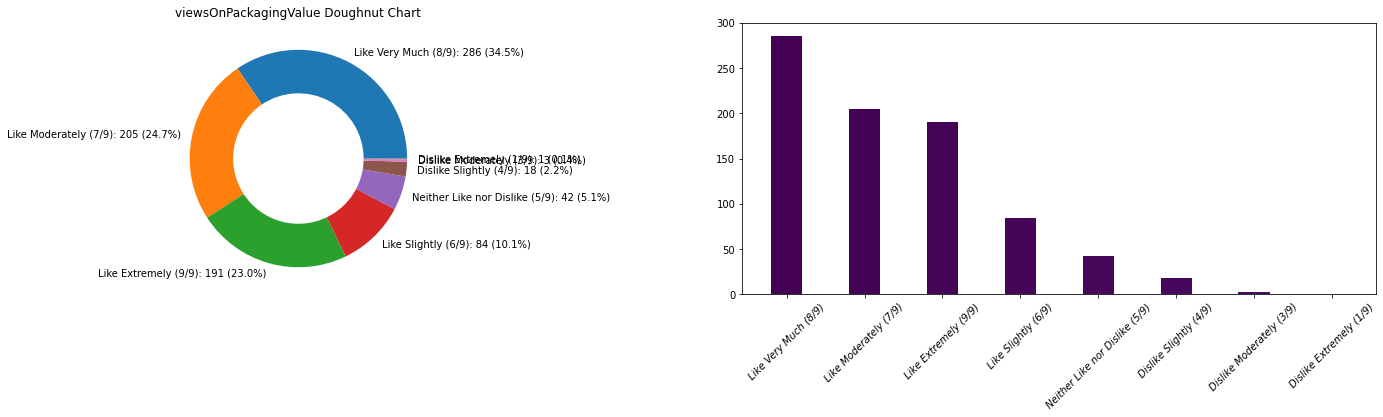

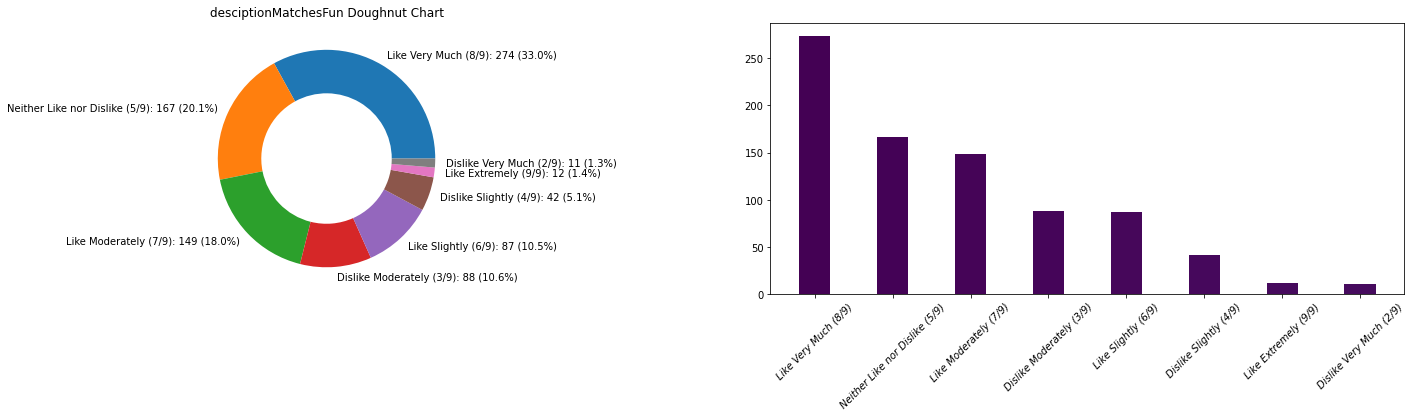

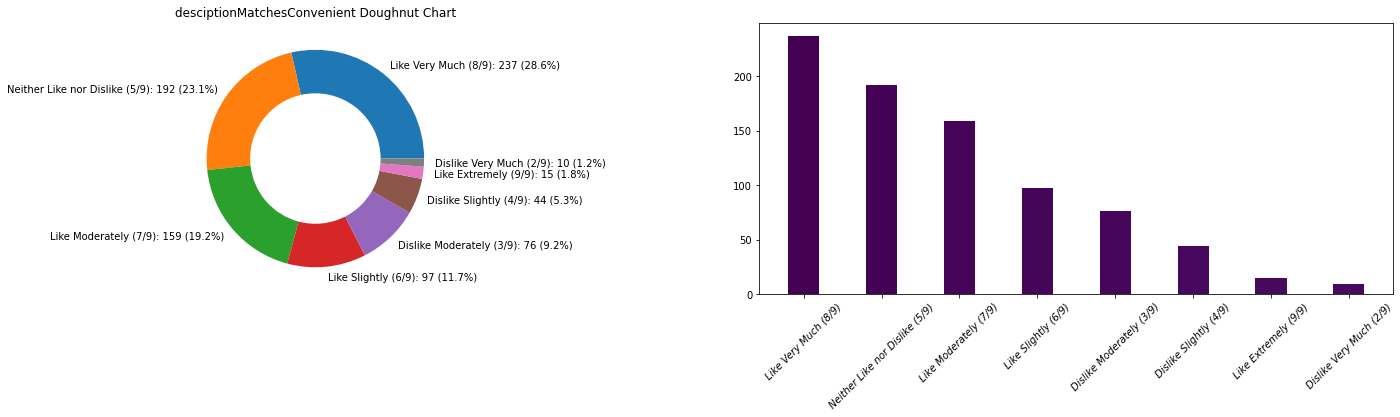

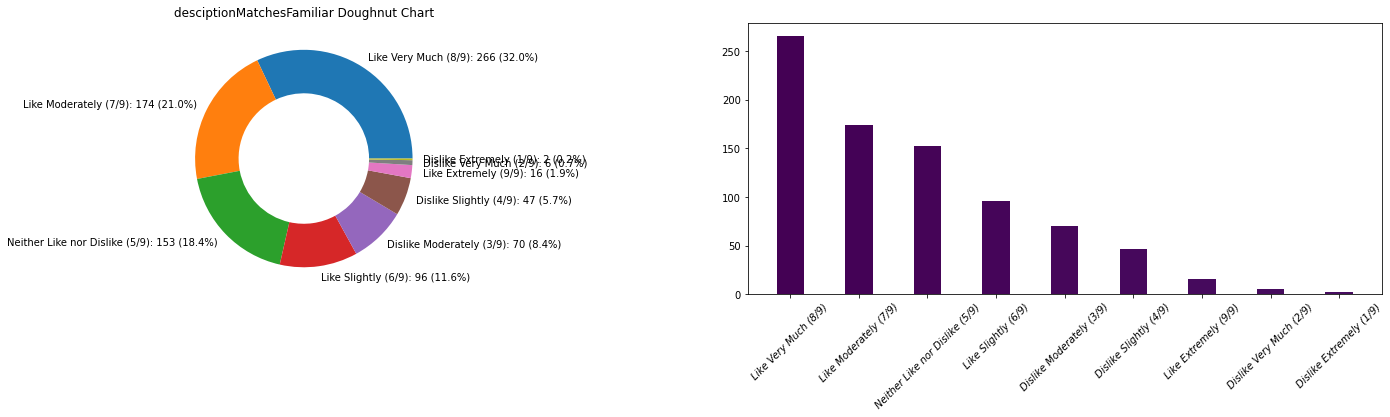

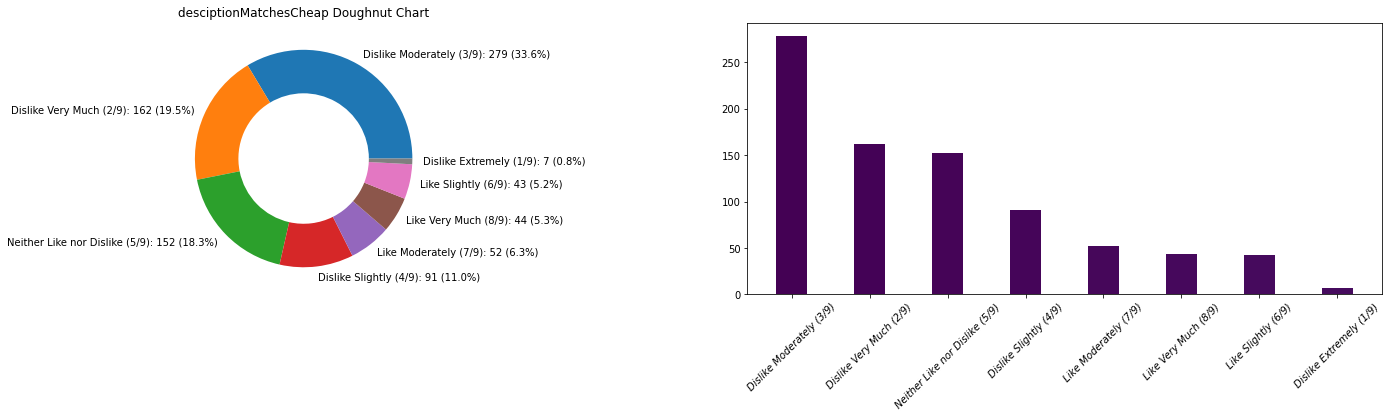

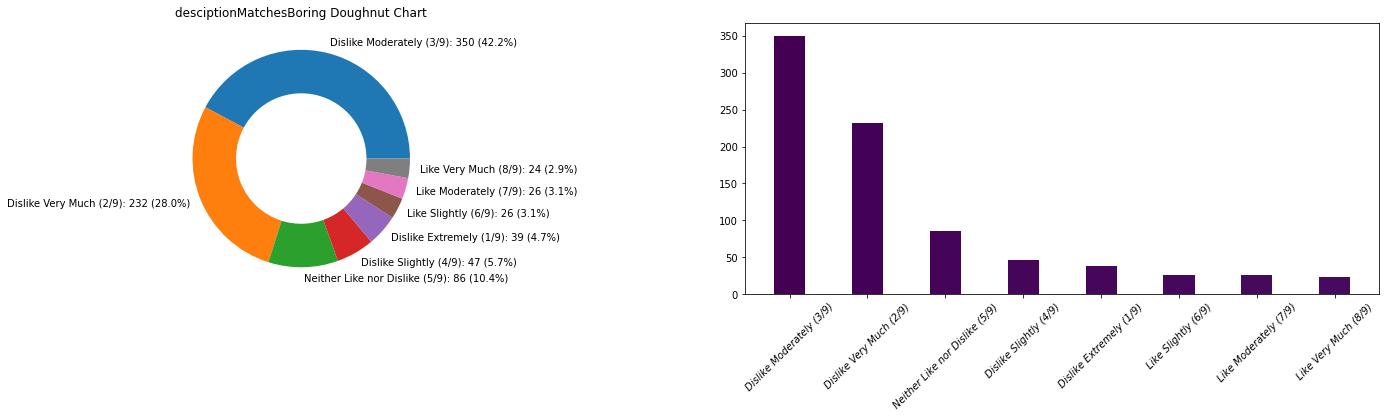

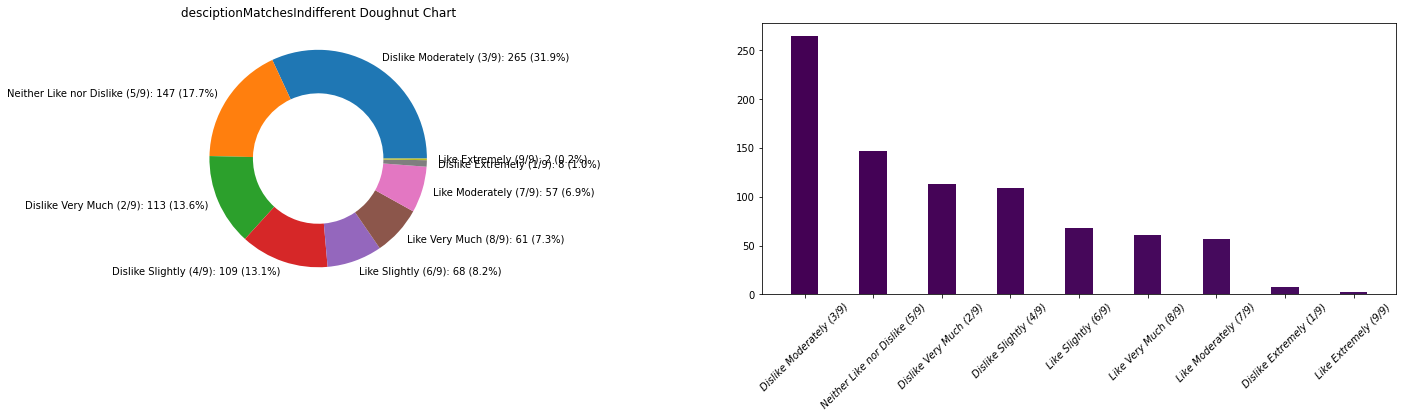

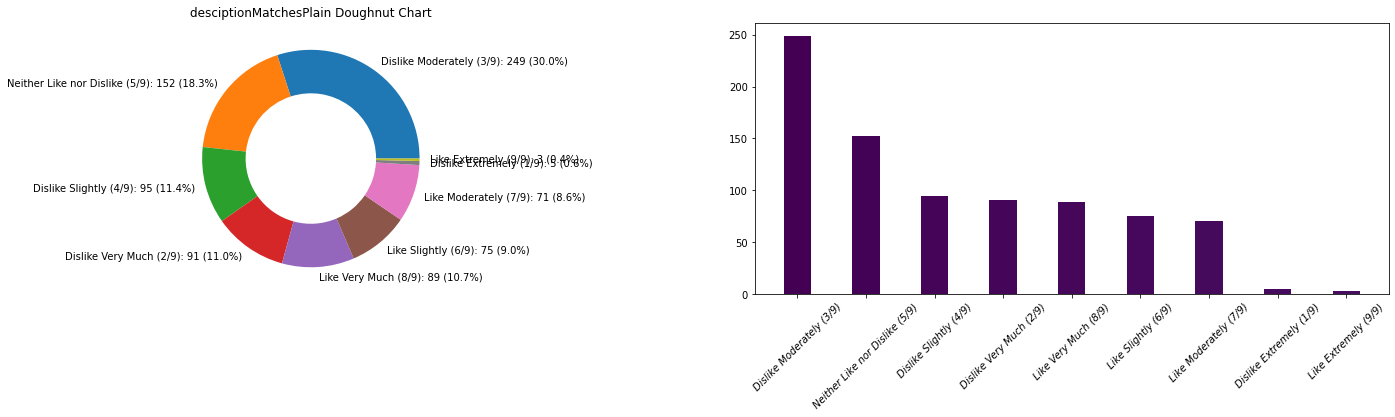

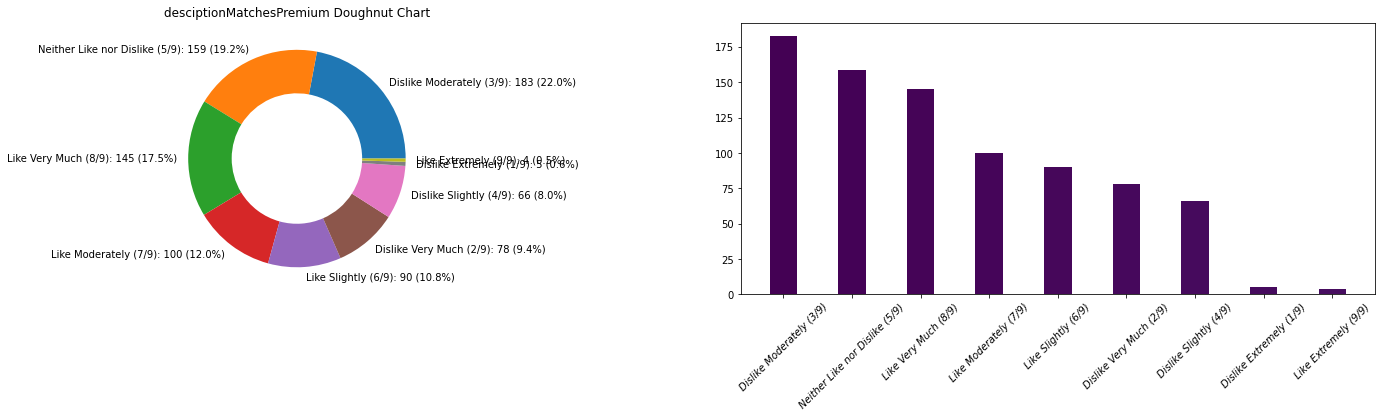

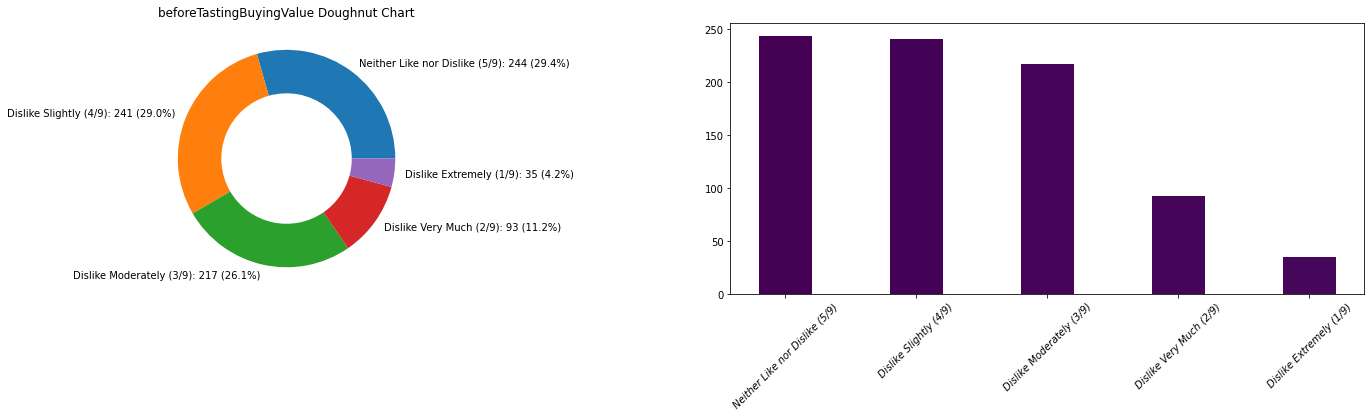

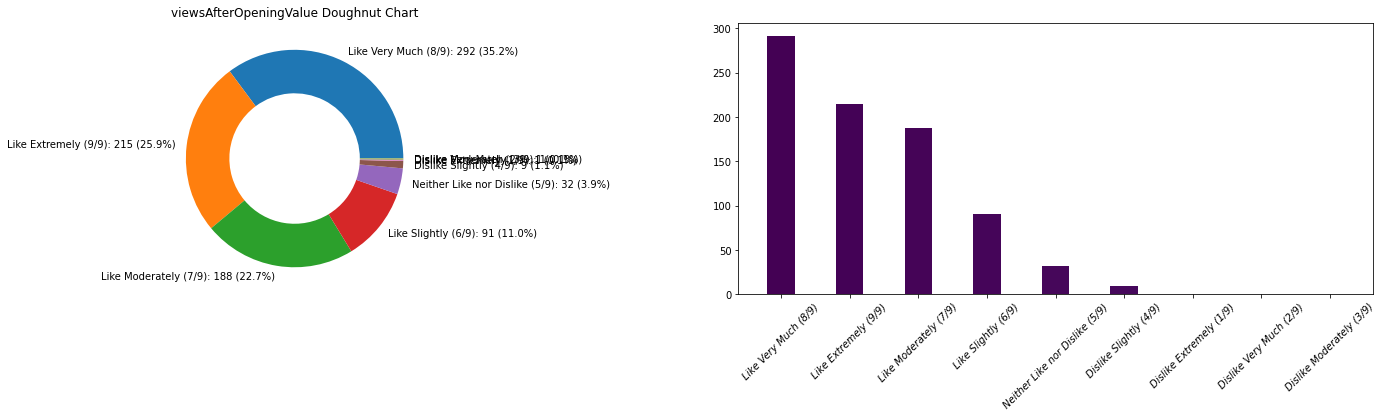

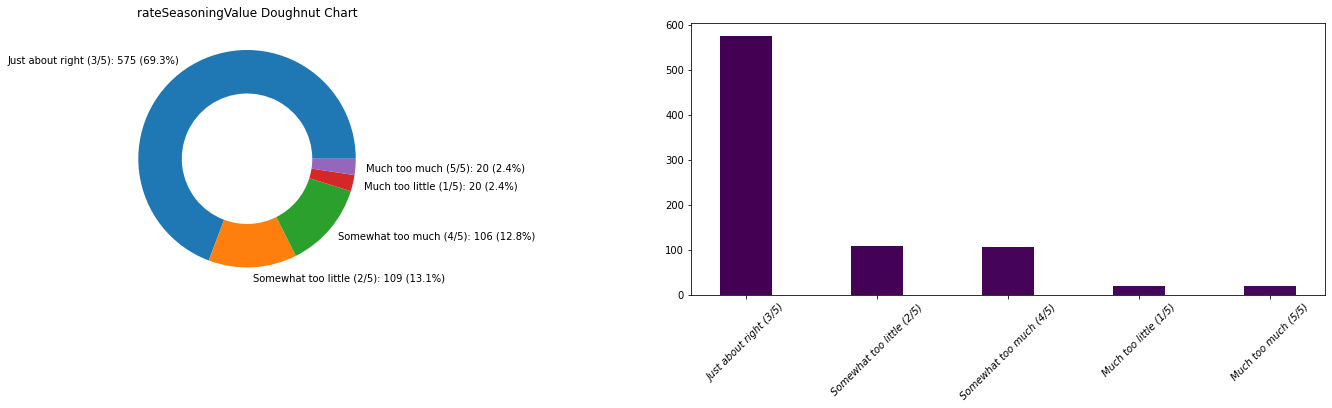

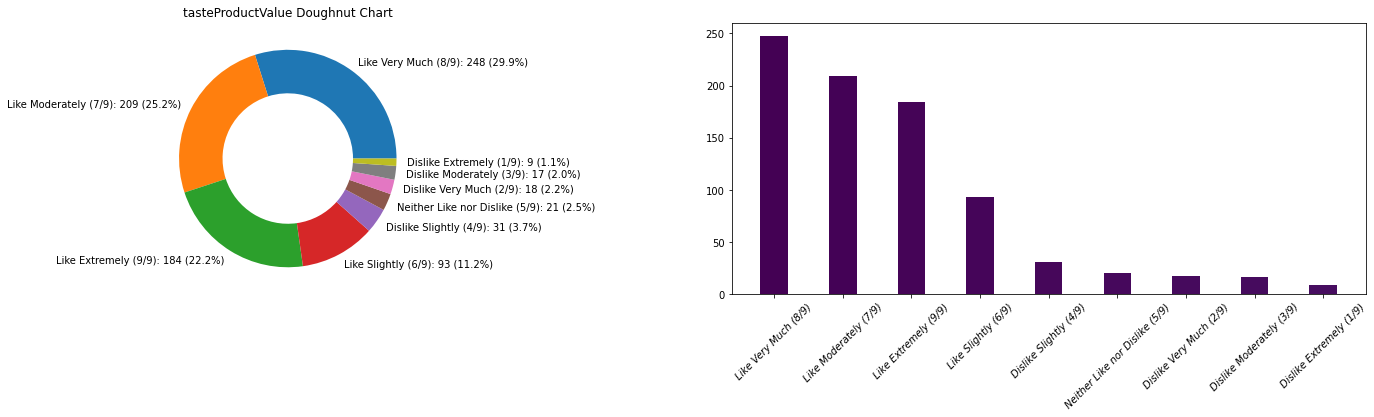

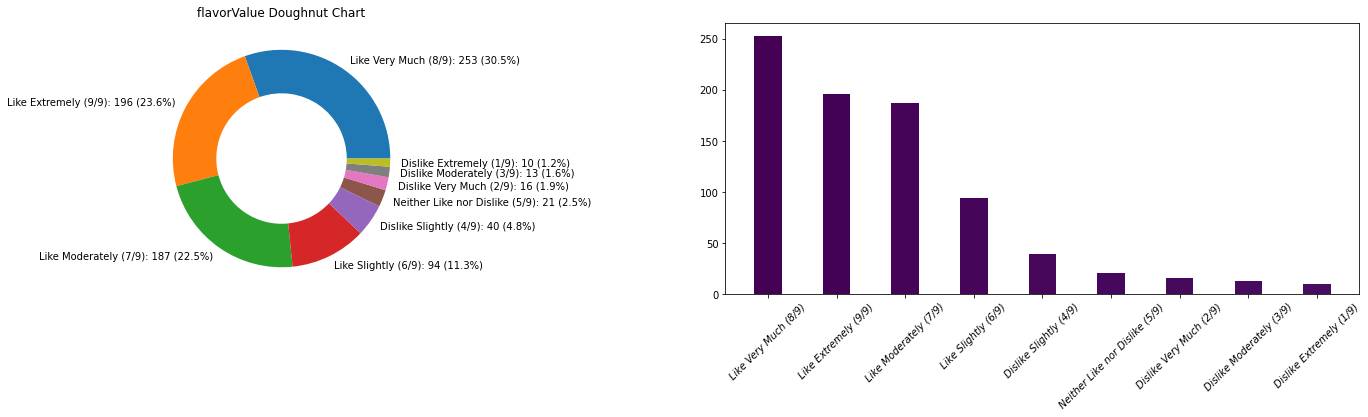

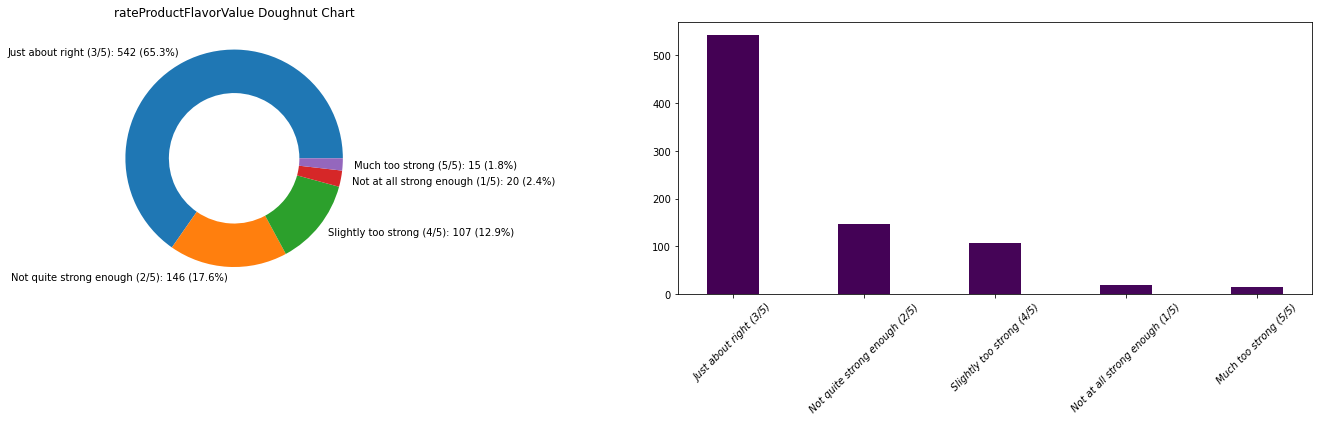

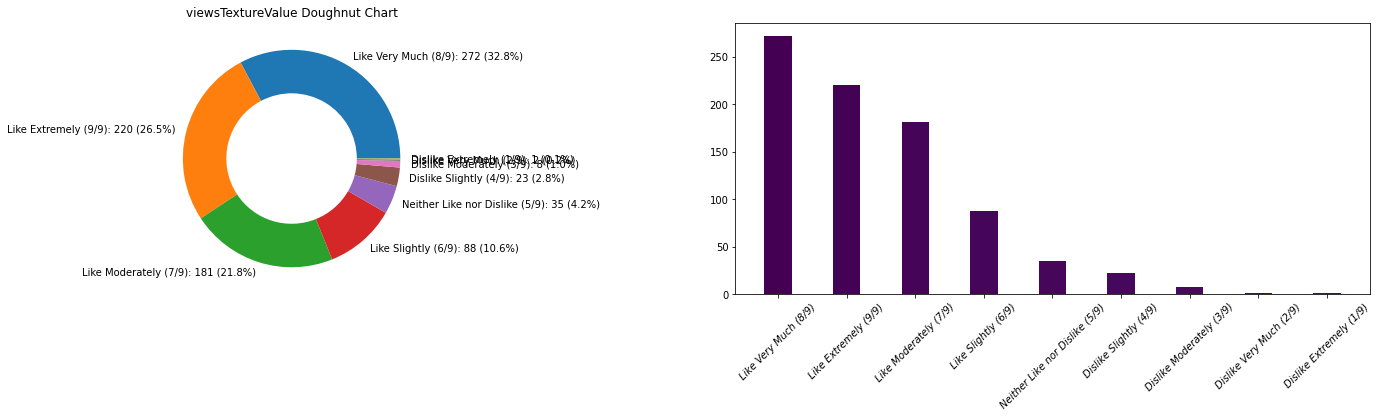

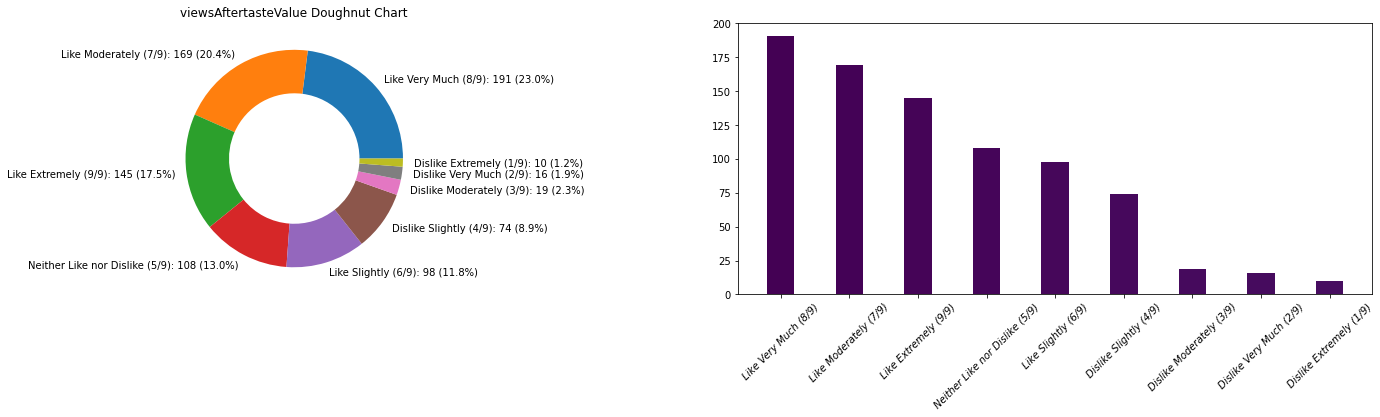

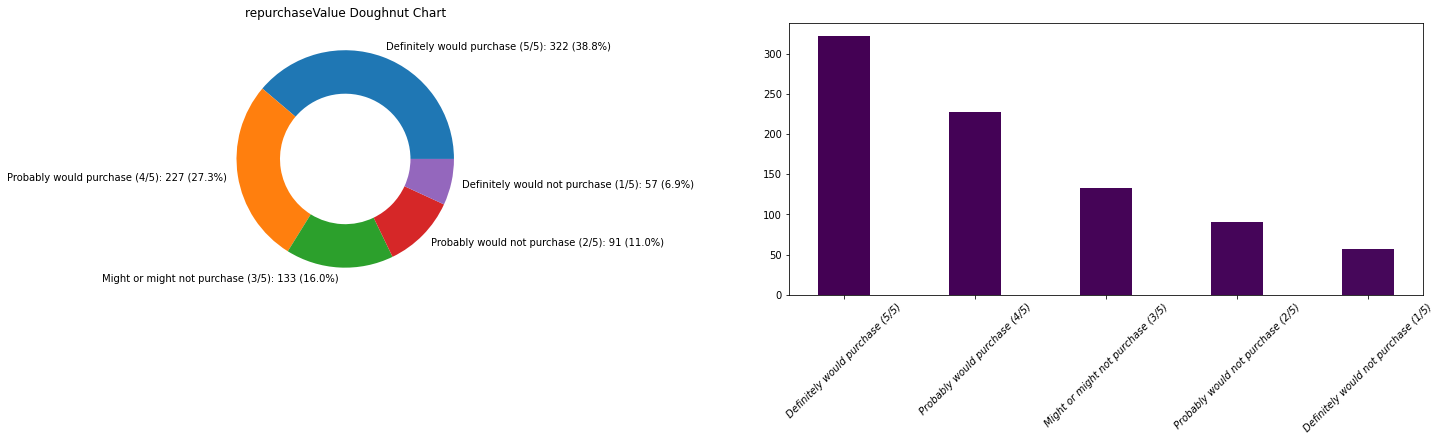

In [ ]:
# Get the names of the columns in the DataFrame
column_names = ['Product', 'genderValue', 'ageGroupValue',
       'viewsOnPackagingValue', 'desciptionMatchesFun',
       'desciptionMatchesConvenient', 'desciptionMatchesFamiliar',
       'desciptionMatchesCheap', 'desciptionMatchesBoring',
       'desciptionMatchesIndifferent', 'desciptionMatchesPlain',
       'desciptionMatchesPremium', 'beforeTastingBuyingValue',
       'viewsAfterOpeningValue', 'rateSeasoningValue', 'tasteProductValue',
       'flavorValue', 'rateProductFlavorValue', 'viewsTextureValue',
       'viewsAftertasteValue', 'repurchaseValue']

# Iterate over the columns
for column in column_names:

    # Get the values and labels for the pie chart
    values = data_label[column].value_counts()
    labels = values.index

    # Create custom labels for the pie chart
    custom_labels = [f"{label}: {count} ({percent:.1f}%)" for label, count, percent in zip(labels, values, values / values.sum() * 100)]

    # Create the figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(25, 5))

    # Create the pie chart in the first subplot
    ax[0].pie(values, labels=custom_labels, wedgeprops={"width": 0.4})
    ax[0].set_title(f"{column} Doughnut Chart")
    
    # Create the bar chart in the second subplot
    colormap = plt.cm.viridis
    ax[1].bar(labels, values, width=0.4, color=colormap(np.arange(len(values))))
    ax[1].set_xticklabels(labels, rotation=45, fontstyle="italic")

    # Show the figure with both charts
    plt.show()


OBSERVATIONS
* THE GRAPHS ABOVE ARE OF EACH FEATURES IN FORM OF DOUGHNUT CHARTS AND BAR CHARTS SIDE BY SIDE FOR COMPARISON

#Bivariate Analysis

Bivariate analysis is a statistical method used to examine the relationship between two variables. In the context of Exploratory Data Analysis (EDA), bivariate analysis is a technique used to analyze and understand the relationship between two variables in a dataset. This can be done through the use of statistical measures such as correlation and regression, as well as through the use of visualization tools such as scatter plots and box plots.

Bivariate analysis is an important step in the EDA process as it helps to identify patterns and relationships in the data that may not be immediately apparent. It can also help identify potential outliers or anomalies in the data, which can be further investigated to better understand their impact on the overall analysis.

Overall, bivariate analysis is a useful tool for understanding the relationship between two variables and can provide valuable insights into the underlying patterns and trends in a dataset.

TASTE VS REPURCHASE

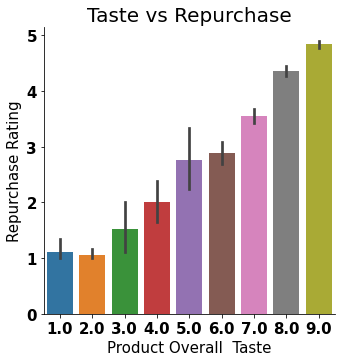

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='tasteProductValue', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Product Overall  Taste', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Taste vs Repurchase', fontsize=20)

# Show plot
plt.show()



MOST PEOPLE LIKE TO RE-PURCHASE PRODUCT WITH BETTER TASTE.

FLAVOR VS REPURCHASE

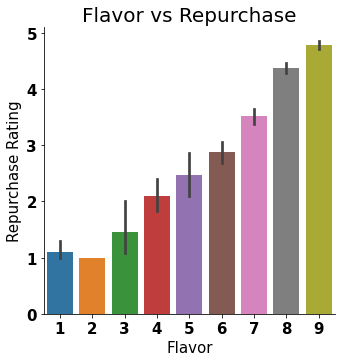

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='flavorValue', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Flavor', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Flavor vs Repurchase', fontsize=20)

# Show plot
plt.show()


MOST PEOPLE LIKE TO RE-PURCHASE PRODUCT WITH BETTER FLAVOR

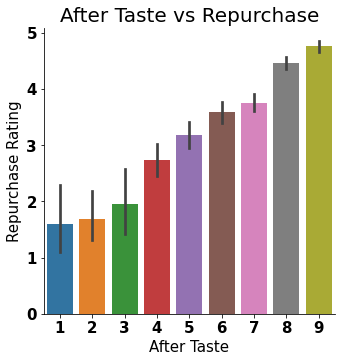

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='viewsAftertasteValue', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('After Taste', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('After Taste vs Repurchase', fontsize=20)

# Show plot
plt.show()


PEOPLE LIKE TO RE-PURCHASE THE PRODUCT AFTER TASTING THE PRODUCT.

PACKAGING VS REPURCHASE

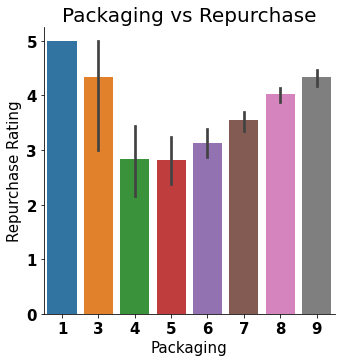

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='viewsOnPackagingValue', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Packaging', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Packaging vs Repurchase', fontsize=20)

# Show plot
plt.show()

PACKAGING HAS SOMEWHAT LESS EFFECT ON RE-PURCHASE. SOME RATED RE-PURCHASE ON PACKAGING WHERAS SOME NOT.

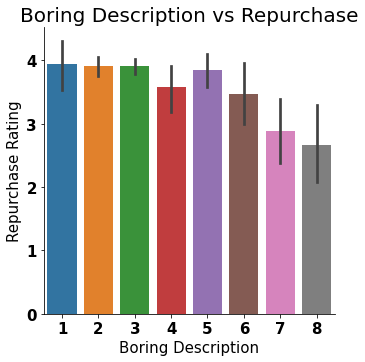

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='desciptionMatchesBoring', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Boring Description', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Boring Description vs Repurchase', fontsize=20)

# Show plot
plt.show()

PRODUCT DESCRIBED AS BORING HAS LESSER RE-PURCHASE VALUE.

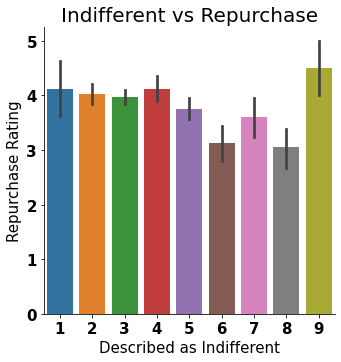

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='desciptionMatchesIndifferent', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Described as Indifferent', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Indifferent vs Repurchase', fontsize=20)

# Show plot
plt.show()

PRODUCT DESCRIBED AS INDIFFERENT HAS MIXED VIEWS REGARDING RE-PURCHASE.

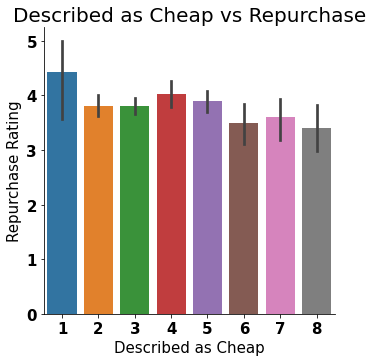

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='desciptionMatchesCheap', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Described as Cheap', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Described as Cheap vs Repurchase', fontsize=20)

# Show plot
plt.show()

PEOPLE DONT LIKE TO BUY PRODUCT DESCRIBED AS CHEAP.

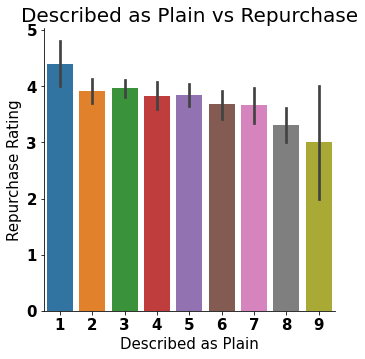

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='desciptionMatchesPlain', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Described as Plain', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Described as Plain vs Repurchase', fontsize=20)

# Show plot
plt.show()

PEOPLE DON'T LIKE TO BUY PRODUCTS DESCRIBED AS PLAIN.

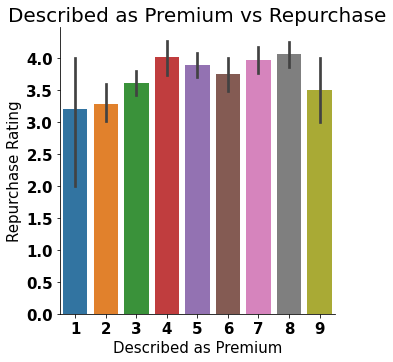

In [ ]:
# Set font for ticks and titles
font = {'family': 'Arial', 'weight': 'bold', 'size': 15}
plt.rc('font', **font)

# Create a box plot with the current x-axis value
fig = sns.catplot(data=data, x='desciptionMatchesPremium', y='repurchaseValue', kind='bar')

# Set x-axis label
plt.xlabel('Described as Premium', fontsize=15)

# Set y-axis label
plt.ylabel('Repurchase Rating', fontsize=15)

# Set title
plt.title('Described as Premium vs Repurchase', fontsize=20)

# Show plot
plt.show()

PEOPLE HAVE MIXED VIEW REGARDING PRODUCT DESCRIBED AS PREMIUM.

#Multivariate Analysis

In the context of exploratory data analysis (EDA), multivariate analysis refers to the analysis of multiple variables or features in a dataset. This type of analysis can help identify patterns and relationships between different variables, and can be useful for understanding the complexity of a dataset and for identifying important predictors or drivers of a response variable.

There are many different techniques that can be used for multivariate analysis, including regression analysis, principal component analysis, factor analysis, and discriminant analysis, among others. These techniques can be used to understand the relationships between variables, to reduce the dimensionality of the data, or to classify observations into different groups.

Multivariate analysis can be an important part of EDA, as it allows us to look at multiple aspects of the data simultaneously and can help us gain a more comprehensive understanding of the patterns and relationships present in the data.

PRODUCT VS REPURCHASE VS BUYING BEFORE TASTING

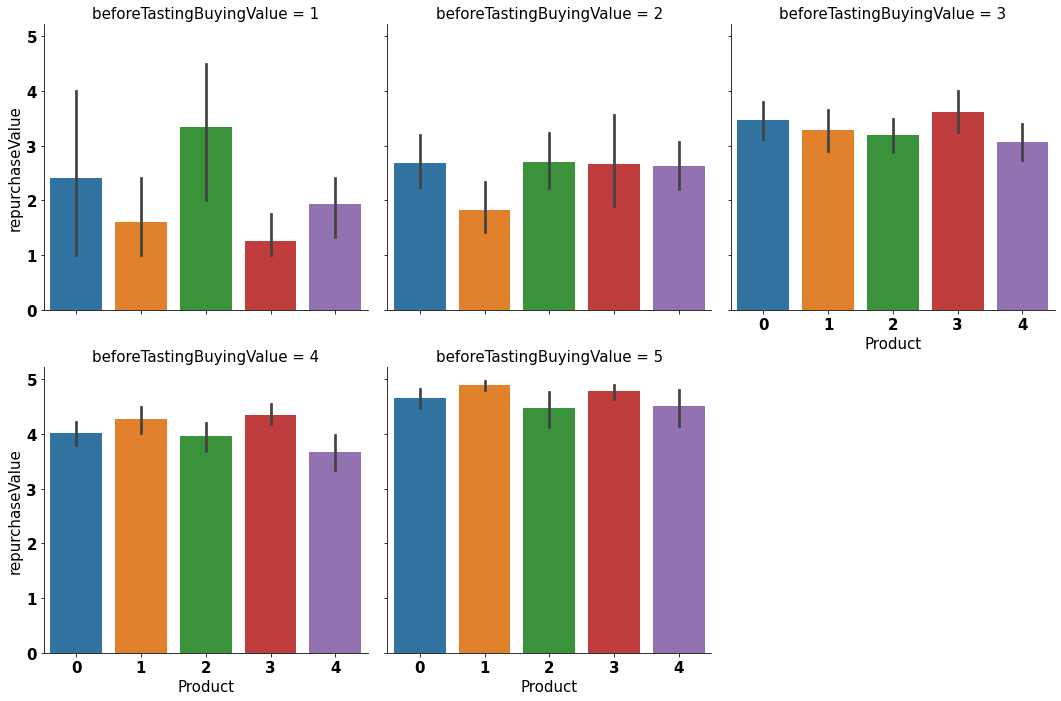

In [ ]:
sns.catplot(data=data, x='Product', y='repurchaseValue',col='beforeTastingBuyingValue', col_wrap=3, kind='bar')

* PRODUCT B AND D HAVE BETTER TASTE AND REPURCHASE RATINGS. MOST PEOPLE LIKE THE PRODUCTS.

PRODUCT VS REPURCHASE VS VIEWS AFTER OPENING

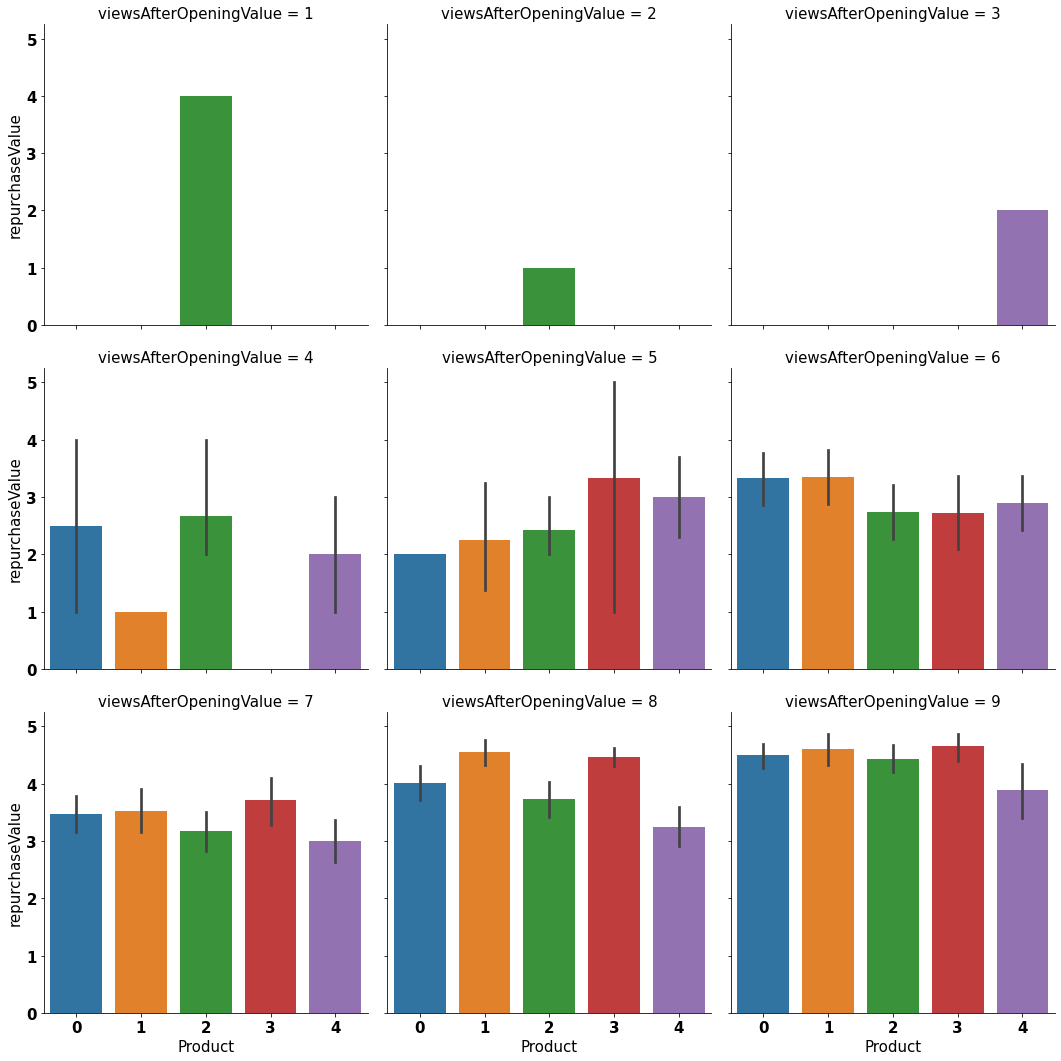

In [ ]:
sns.catplot(data=data, x='Product', y='repurchaseValue',col='viewsAfterOpeningValue', col_wrap=3, kind='bar')

* PRODUCT B AND D HAVE BETTER VIEWS AFTER OPENING THE PRODUCT AND HENCE THE REPURCHASE RATINGS. PEOPLE LIKE THE PRODUCT AFTER OPENING.

PRODUCTS VS REPURCHASE VS VIEWS AFTER TASTE

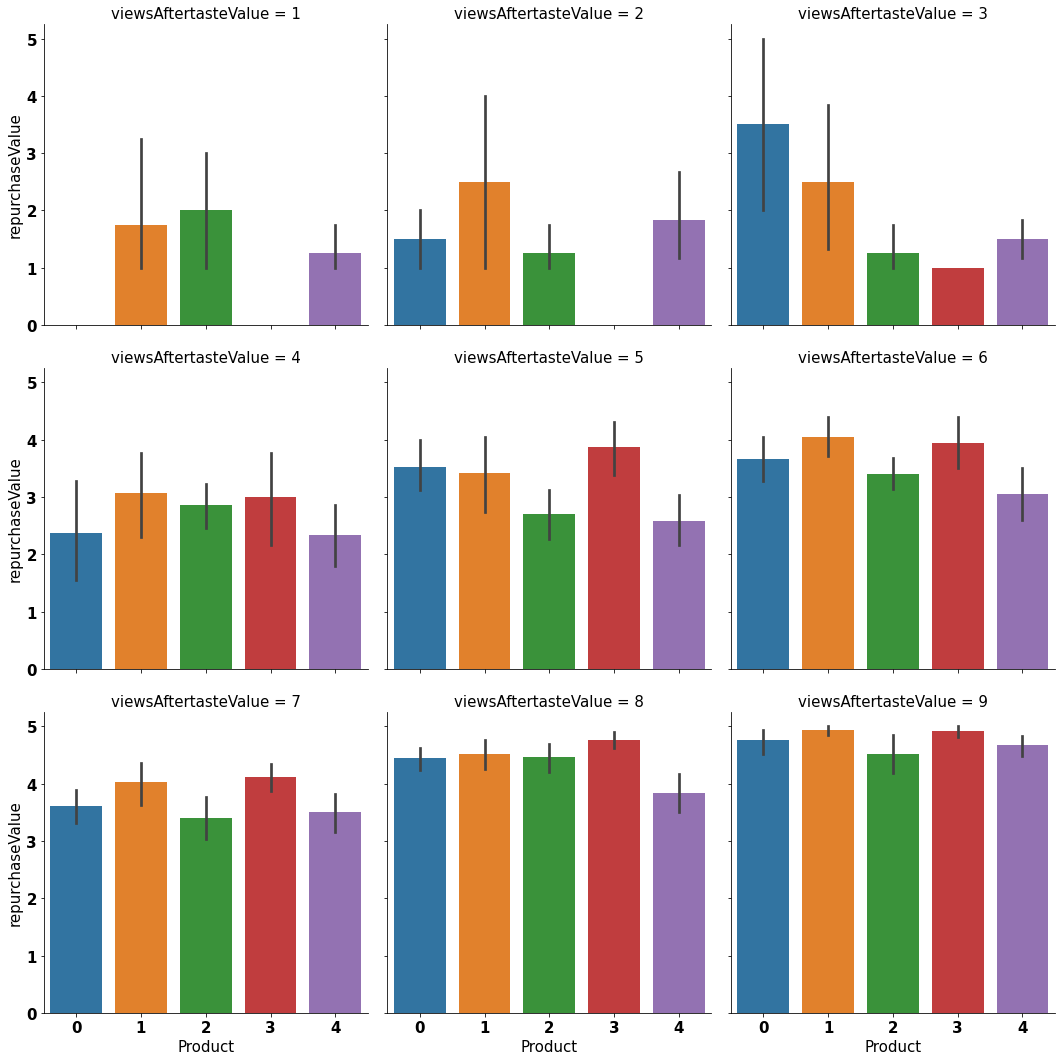

In [ ]:

sns.catplot(data=data, x='Product', y='repurchaseValue',col='viewsAftertasteValue', col_wrap=3, kind='bar')

* VIEWS AFTER TASTE IS MIXED. MOST PEOPLE LKE ALL THE PRODUCTS. PRODUCT MOST LIKED BY THEM IS B AND D. MOST OF RATE ABOVE 5 AND FEW PEOPLE RATED LESS.

**CONCLUSION**

* BUYING DEPENDS UPON TASTE, FLAVOR.
* PACKAGING HAS LESSER EFFECT ON RE-PURCHASE
* DESCRIPTION EFFECT REPURCHASE. POSITIVE DISCRIPTION INCREASES REPURCHASE WHILE NEGATIVE DESCRIPTION LOWERS REPURCHASE.
* PEOPLE VIEWS CHANGE AFTER TASTE AND BEFORE TASTE
* PEOPLE TASTING THE PRODUCT SHOWED MORE INTEREST IN BUYING THE PRODUCT
* VIEWS ON FLAVOR VARY FROM PEOPLE TO PEOPLE